In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [13]:
mnist= tf.keras.datasets.mnist
(train_images,train_labels) , (test_images,test_labels)=mnist.load_data()

train_images.shape :  (60000, 56, 56)


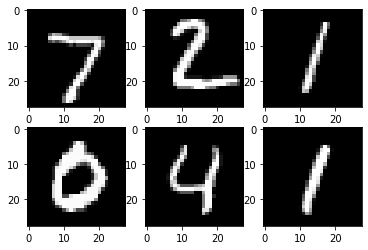

In [14]:
temp=[]
for i in range(len(train_images)):
    (x,y) = (random.randint(0,28),random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += train_images[i]
    temp.append(temp_img)
    
train_images=np.array(temp)
print('train_images.shape : ',train_images.shape)
train_images = train_images.reshape((60000,56,56,1))
train_images = train_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(test_images[i],cmap='gray')
plt.show()

test_images.shape :  (10000, 56, 56)


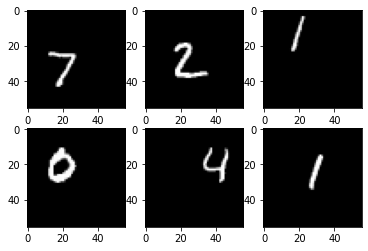

In [15]:
temp=[]
for i in range(len(test_images)):
    (x,y) = (random.randint(0,28),random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += test_images[i]
    temp.append(temp_img)
    
test_images=np.array(temp)
print('test_images.shape : ',test_images.shape)
test_images = test_images.reshape((10000,56,56,1))
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(test_images[i],cmap='gray')
plt.show()

In [16]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(56,56,1)))
model.add(tf.keras.layers.Dense(256,activation= 'relu'))
model.add(tf.keras.layers.Dense(128,activation= 'relu'))
model.add(tf.keras.layers.Dense(10))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               803072    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 837,258
Trainable params: 837,258
Non-trainable params: 0
_________________________________________________________________


In [17]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 1.1122 - accuracy: 0.6241
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4733 - accuracy: 0.8502
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3153 - accuracy: 0.8999
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2251 - accuracy: 0.9277
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1662 - accuracy: 0.9463
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1307 - accuracy: 0.9571
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0999 - accuracy: 0.9670
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9708
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9759
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9771

In [18]:
model.evaluate(test_images,test_labels,batchSize)

157/157 [==============================] - 0s 607us/step - loss: 0.5667 - accuracy: 0.8764


[0.5666999220848083, 0.8763999938964844]

Prediction :  4


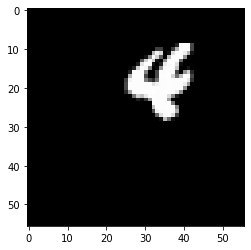

In [19]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label)



313/313 [==============================] - 0s 434us/step


<AxesSubplot:>

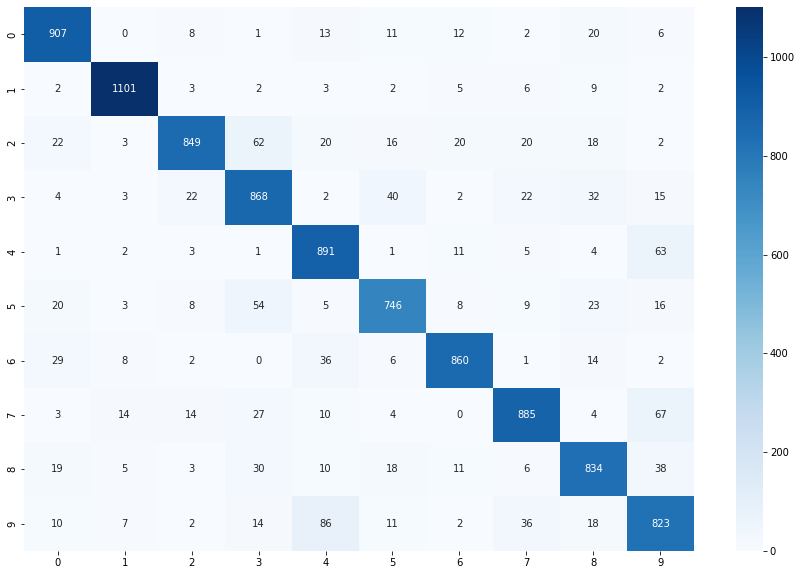

In [20]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")